In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("spam.csv", encoding="latin1")
dataset.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [3]:
dataset.shape

(5572, 5)

# data cleaning

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
dataset.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [6]:
dataset.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [7]:
dataset.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [8]:
dataset.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(dataset[["target"]])

C:\Users\Sachin Singh\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:103: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [10]:
dataset["target"]=le.transform(dataset["target"])

In [11]:
dataset.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [12]:
dataset.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
dataset.duplicated().sum()

np.int64(403)

In [14]:
dataset=dataset.drop_duplicates(keep= "first")

# EDA

In [15]:
val_count=dataset["target"].value_counts()

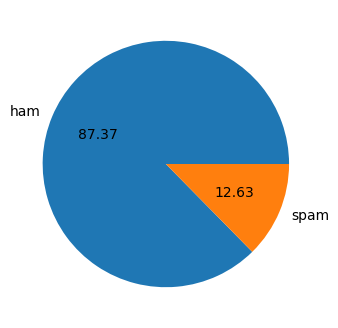

In [16]:
plt.figure(figsize=(5,4))
plt.pie(val_count, labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [17]:
import nltk

In [18]:
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to C:\Users\Sachin
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Sachin
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
dataset["num_char"]=dataset["text"].apply(len)
dataset.head(3)

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [20]:
dataset["num_word"]=dataset["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [21]:
dataset.head(3)

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [22]:
dataset["num_sent"]=dataset["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
dataset.head(3)

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [23]:
dataset.describe()

,target,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [24]:
dataset[dataset["target"]==0].describe()

,target,num_char,num_word,num_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [25]:
dataset[dataset["target"]==1].describe()

,target,num_char,num_word,num_sent
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [26]:
ham=dataset[dataset["target"]==0]

In [27]:
spam=dataset[dataset["target"]==1]

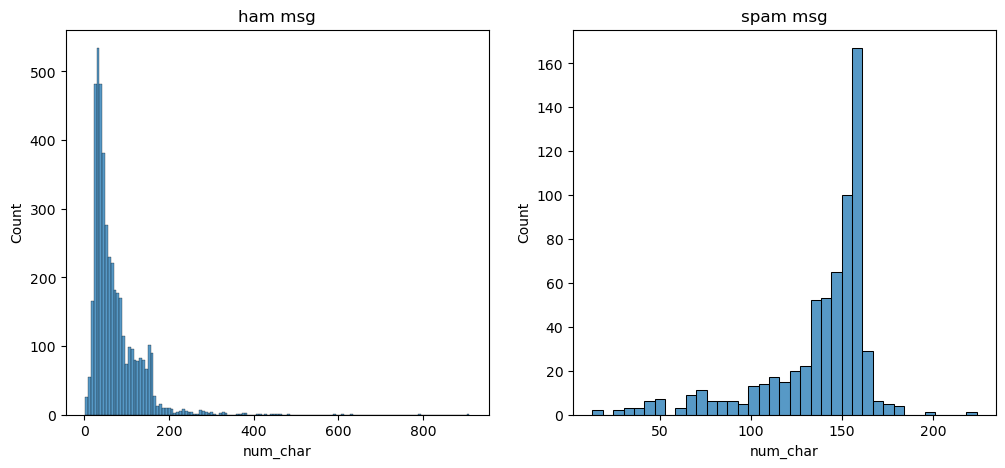

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("ham msg")
sns.histplot(ham.num_char)

plt.subplot(1,2,2)
plt.title("spam msg")
sns.histplot(spam.num_char)
plt.show()

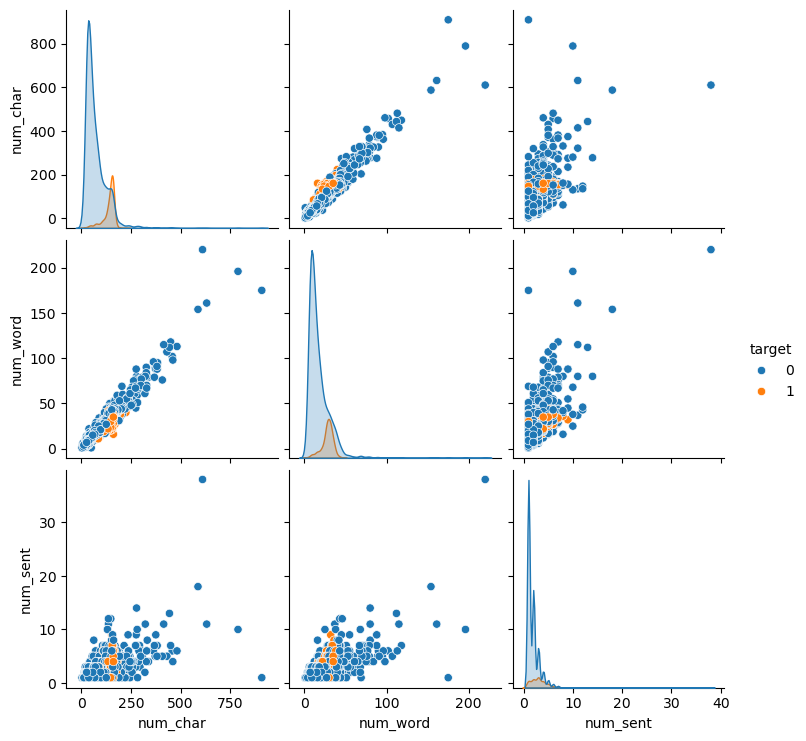

In [29]:
sns.pairplot(dataset,hue="target")
plt.show()

In [30]:
dataset.head(3)

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [31]:
data1=dataset.corr(numeric_only=True)

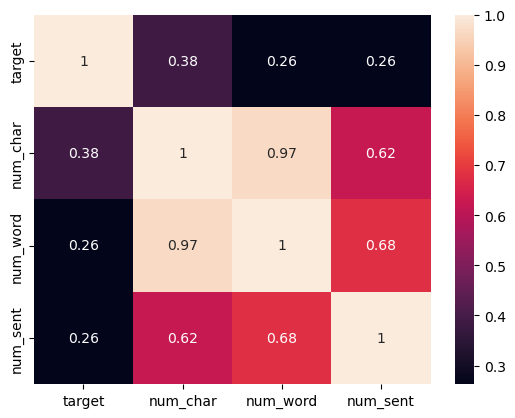

In [32]:
sns.heatmap(data1,annot=True)
plt.show()

# data preprocessing
    .lower case
    .tokenization
    .removing special characters
    .removing stop words and punctuation
    .stemming

In [33]:
def text_trans(text):
    text= text.lower()
    text= nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
         y.append(ps.stem(i))
            
    return " ".join(y)

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sachin
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem("singing")

'sing'

In [38]:
text_trans(dataset["text"][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [39]:
dataset["text"][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [40]:
dataset["text_trans"]=dataset["text"].apply(text_trans)

In [41]:
dataset.head(3)

,target,text,num_char,num_word,num_sent,text_trans
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [42]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [43]:
import sys
!"{sys.executable}" -m pip install wordcloud

In [44]:
spam_wc=wc.generate(dataset[dataset["target"]==1]["text_trans"].str.cat(sep=" "))

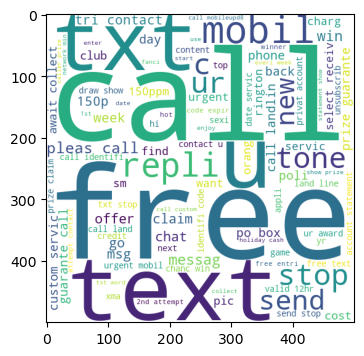

In [45]:
plt.figure(figsize=(5,4))
plt.imshow(spam_wc)

In [46]:
ham_wc=wc.generate(dataset[dataset["target"]==0]["text_trans"].str.cat(sep=" "))

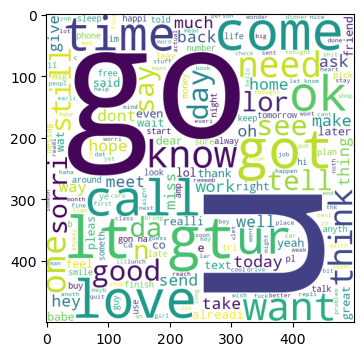

In [47]:
plt.figure(figsize=(5,4))
plt.imshow(ham_wc)

In [48]:
spam_corpus=[]
for msg in dataset[dataset["target"]==1]["text_trans"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

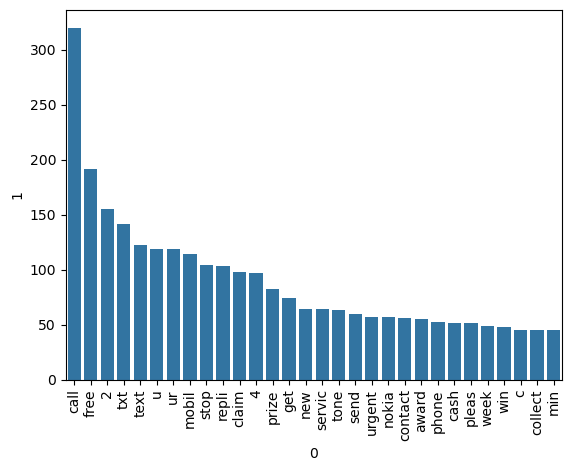

In [50]:
from collections import Counter
sns.barplot(data=pd.DataFrame(Counter(spam_corpus).most_common(30)), x=0, y=1)
plt.xticks(rotation="vertical")
plt.show()

In [51]:
ham_corpus=[]
for msg in dataset[dataset["target"]==0]["text_trans"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35404

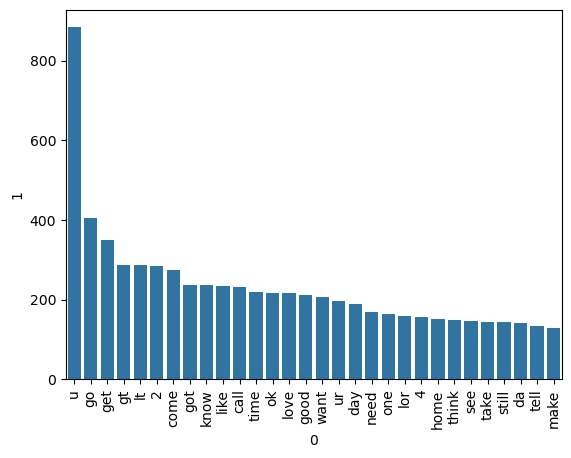

In [53]:
from collections import Counter
sns.barplot(data=pd.DataFrame(Counter(ham_corpus).most_common(30)), x=0, y=1)
plt.xticks(rotation="vertical")
plt.show()

# model building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(dataset["text_trans"]).toarray()

In [55]:
x.shape

(5169, 3000)

In [56]:
y=dataset["target"]

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [59]:
gnb= GaussianNB()
gnb.fit(x_train,y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [60]:
y_pred= gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8626692456479691
[[771 118]
 [ 24 121]]
0.5062761506276151


In [61]:
mnb= MultinomialNB()
mnb.fit(x_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [62]:
y_pred= mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [63]:
bnb= BernoulliNB()
bnb.fit(x_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"binarize binarize: float or None, default=0.0Threshold for binarizing (mapping to booleans) of sample features.If None, input is presumed to already consist of binary vectors.",0.0
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [64]:
y_pred= bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [66]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [67]:
svc= SVC( kernel="sigmoid", gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver= "liblinear", penalty="l1")
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [68]:
clfs={
    "SVC":svc,
    "KN":knc,
    "NB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBC":gbc,
    "XGB":xgb
}

In [69]:
def train_classifier(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train,y_train)
    y_pred= clf.predict(x_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test, y_pred)

    return accuracy, precision

In [70]:
train_classifier(svc,x_train,x_test,y_train,y_test)

(0.9758220502901354, 0.9477611940298507)

In [71]:
accuracy_scores=[]
precision_scores=[]

for name , clf in clfs.items():
    
    current_acc,current_pre= train_classifier(clf,x_train, x_test, y_train, y_test)
    
    print("for", name)
    print("accuracy",current_acc)
    print("precision",current_pre)

    accuracy_scores.append(current_acc)
    precision_scores.append(current_pre)

for SVC
accuracy 0.9758220502901354
precision 0.9477611940298507
for KN
accuracy 0.9148936170212766
precision 1.0
for NB
accuracy 0.9729206963249516
precision 0.9915966386554622
for DT
accuracy 0.9313346228239845
precision 0.8135593220338984
for LR
accuracy 0.9468085106382979
precision 0.8629032258064516


C:\Users\Sachin Singh\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Sachin Singh\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


for RF
accuracy 0.971953578336557
precision 0.9915254237288136
for AdaBoost
accuracy 0.913926499032882
precision 0.7916666666666666
for BgC
accuracy 0.960348162475822
precision 0.8768115942028986
for ETC
accuracy 0.9796905222437138
precision 1.0
for GBC
accuracy 0.9497098646034816
precision 0.9514563106796117
for XGB
accuracy 0.9680851063829787
precision 0.9375


In [72]:
performance_dataset = pd.DataFrame({
    'algo': clfs.keys(), 
    'accuracy': accuracy_scores, 
    'precision': precision_scores
}).sort_values("precision", ascending=False)

In [73]:
performance_dataset

,algo,accuracy,precision
1,KN,0.914894,1.000000
8,ETC,0.979691,1.000000
2,NB,0.972921,0.991597
5,RF,0.971954,0.991525
9,GBC,0.949710,0.951456
0,SVC,0.975822,0.947761
10,XGB,0.968085,0.937500
7,BgC,0.960348,0.876812
4,LR,0.946809,0.862903
3,DT,0.931335,0.813559


In [74]:
performance_dataset1= pd.melt(performance_dataset, id_vars= "algo")

In [75]:
performance_dataset1

,algo,variable,value
0,KN,accuracy,0.914894
1,ETC,accuracy,0.979691
2,NB,accuracy,0.972921
3,RF,accuracy,0.971954
4,GBC,accuracy,0.949710
5,SVC,accuracy,0.975822
6,XGB,accuracy,0.968085
7,BgC,accuracy,0.960348
8,LR,accuracy,0.946809
9,DT,accuracy,0.931335


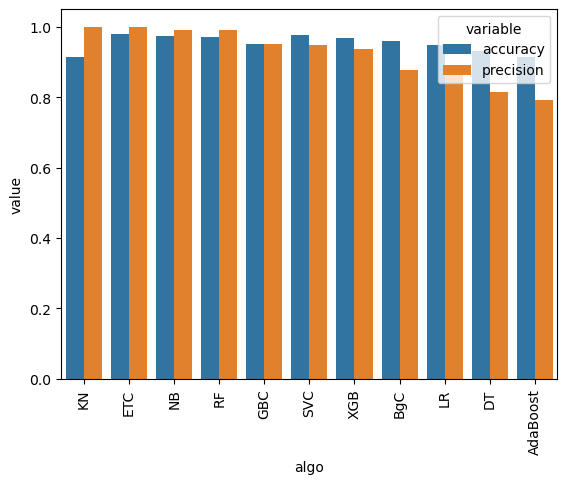

In [76]:
sns.barplot(data=performance_dataset1, x="algo", y="value", hue="variable")
plt.xticks(rotation="vertical")
plt.show()

In [85]:
svc=SVC(kernel="sigmoid", gamma=1.0, probability=True)
mnb=MultinomialNB()
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)

In [86]:
from sklearn.ensemble import VotingClassifier

In [87]:
vc=VotingClassifier(estimators=[("svm",svc), ("nb",mnb),("etc",etc)],voting="soft")

In [88]:
vc.fit(x_train,y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svm', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.0
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [92]:
y_pred= vc.predict(x_test)
print("accuracy", accuracy_score(y_test,y_pred))
print("precision", precision_score(y_test,y_pred))

accuracy 0.9835589941972921
precision 1.0


In [99]:
estimators=[("svm",svc), ("nb",mnb),("etc",etc)]
final_estimator= RandomForestClassifier()

In [100]:
from sklearn.ensemble import StackingClassifier

In [101]:
sc= StackingClassifier(estimators= estimators,final_estimator= final_estimator)

In [102]:
sc.fit(x_train,y_train)

,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.The type of estimator is generally expected to be a classifier.However, one can pass a regressor for some use case (e.g. ordinalregression).","[('svm', ...), ('nb', ...), ...]"
,"final_estimator final_estimator: estimator, default=NoneA classifier which will be used to combine the base estimators.The default classifier is a:class:`~sklearn.linear_model.LogisticRegression`.",RandomForestClassifier()
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",None
,"stack_method stack_method: {'auto', 'predict_proba', 'decision_function', 'predict'}, default='auto'Methods called for each base estimator. It can be:* if 'auto', it will try to invoke, for each estimator, `'predict_proba'`, `'decision_function'` or `'predict'` in that order.* otherwise, one of `'predict_proba'`, `'decision_function'` or `'predict'`. If the method is not implemented by the estimator, it will raise an error.",'auto'
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",None
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degre

In [103]:
y_pred= sc.predict(x_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("precision", precision_score(y_test,y_pred))

accuracy 0.9825918762088974
precision 0.9568345323741008


In [105]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(vc,open("model.pkl","wb"))

# evaluation

# improvement

# website

# deploy